In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

print("Guide to read results")
print("GCN , Deepsets, Deepsets (prop training) are three different models")
print("GCN and Deepsets have been trained on curriculum sampling at most 2 assignments in reach/avoid")
print("Deepsets (prop training) has also seen complete pieces assignments in training")

Guide to read results
GCN , Deepsets, Deepsets (prop training) are three different models
GCN and Deepsets have been trained on curriculum sampling at most 2 assignments in reach/avoid
Deepsets (prop training) has also seen complete pieces assignments in training


In [ ]:
def read_results(env_name):
    parent = "results_chessworld/" + env_name + "/"
    
    gcn_name =  parent + env_name + "_gcn.csv"
    deepsets_name = parent + env_name + "_deepsets_full.csv"
    deepsets_prop_name = parent + env_name + "_deepsets_prop.csv"
    
    df_gcn = pd.read_csv(gcn_name).drop(columns=["Avg Discounted Return"])
    df_dps = pd.read_csv(deepsets_name).drop(columns=["Avg Discounted Return"])
    df_prop = pd.read_csv(deepsets_prop_name).drop(columns=["Avg Discounted Return"])

    df_gcn.set_index(["Task Set", "Task ID"], inplace=True)
    df_dps.set_index(["Task Set", "Task ID"], inplace=True)
    df_prop.set_index(["Task Set", "Task ID"], inplace=True)

    df_concat = pd.concat([df_gcn, df_dps, df_prop], axis=1, keys=["GCN", "Deepsets", "Deepsets (prop training)"])

    return df_concat


In [ ]:
def generalized_read_results(env_name, files, keys):
    parent = "results_chessworld/" + env_name + "/"
    all_dfs = []

    for file in files:
        cur_name = parent + file + ".csv"
        cur_df = pd.read_csv(cur_name)
        cur_df.set_index(["Task Set", "Task ID"], inplace=True)

        if "Avg Discounted Return" in cur_df.columns:
            cur_df.drop(columns=["Avg Discounted Return"], inplace=True)

        all_dfs.append(cur_df)

    df_concat = pd.concat(all_dfs, axis=1, keys=keys)

    return df_concat

In [ ]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_chessworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)
    
            if "Avg Discounted Return" in cur_df.columns:
                cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = sum(final_dfs.values()) / len(final_dfs)
    return final_dfs, df_mean

In [ ]:
# ChessWorld-v0 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v0/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

In [ ]:
read_results("ChessWorld-v0")

In [ ]:
# ChessWorld-v1 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

In [ ]:
read_results("ChessWorld-v1")

In [ ]:
# ChessWorld-v2 tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v2/tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

In [ ]:
read_results("ChessWorld-v2")

In [ ]:
def make_ablation_graphs(goal, parent="chessworld8_ablation/"):
    df = pd.read_csv(parent + goal + "/results.csv", index_col=0, header=[0,1])

    # successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Get all 'successes_mean' values

    # # Plot each column
    # plt.figure(figsize=(8, 5))
    # for col in successes_mean_df.columns:
    #     plt.plot(successes_mean_df.index, successes_mean_df[col], marker="o", label=col)
    
    # # Formatting
    # plt.xlabel("X-axis Label (e.g., Task Number)")
    # plt.ylabel("Success Rate")
    # plt.title("Success Rates Across Models")
    # plt.legend(title="Model")
    # plt.grid(True)
    
    # # Show plot
    # plt.show()


    # Extract successes_mean and successes_std
    successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Mean values
    successes_std_df = df.xs("successes_std", axis=1, level=1)    # Standard deviation values
    
    # Plot each model with error bars
    plt.figure(figsize=(8, 5))
    for col in successes_mean_df.columns:
        plt.errorbar(
            successes_mean_df.index, 
            successes_mean_df[col], 
            yerr=successes_std_df[col],  # Add standard deviation as error bars
            fmt="o-",  # Markers with lines
            capsize=4,  # Small caps on error bars
            label=col
        )
    
    # Formatting
    plt.xlabel("Cardinality of avoid set")
    plt.ylabel("Success Rate")
    plt.title(goal)
    plt.legend(title="Model")
    plt.grid(True)
    
    # Show plot
    plt.show()

    

In [ ]:
make_ablation_graphs("(pawn)")

In [ ]:
make_ablation_graphs("(knight)")

In [ ]:
make_ablation_graphs("(knight & rook)")

In [ ]:
make_ablation_graphs("(bishop & rook)")

In [ ]:
make_ablation_graphs("(queen & bishop)")

In [ ]:
print("Guide to read new results")
print("GCN , Deepsets are the models, trained on different curriculums")
print("The number in brackets indicates threshold for completing training")
print("Leaving model to train usually ends up in overfitting the reach stay task")

In [ ]:
# ChessWorld-v1 new finite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/finite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

In [ ]:
keys_new = ['Deepsets (0.85)', 'Deepsets (0.9)', 'Deepsets (15M)', 'GCN (0.85)', 'GCN (0.9)', 'GCN (15M)', 'GCN (defrosted 25M)']

In [ ]:
files_finite = ['ChessWorld-v1_deepsets_stay_update_4',
                'ChessWorld-v1_deepsets_stay_update_4_fine',
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_gcn_formula_big_skip_6',
                'ChessWorld-v1_gcn_formula_big_skip_6_fine',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_gcn_formula_big_skip_6_finest'
               ]

generalized_read_results('ChessWorld-v1', files_finite, keys_new)

In [ ]:
# ChessWorld-v1 infinite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/infinite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

In [ ]:
files_infinite = ['ChessWorld-v1_deepsets_stay_update_4_inf',
                  'ChessWorld-v1_deepsets_stay_update_4_fine_inf',
                  'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_fine_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                  'ChessWorld-v1_gcn_formula_big_skip_6_finest_inf'
                 ]

generalized_read_results('ChessWorld-v1', files_infinite, keys_new)

In [ ]:
def make_ablation_graphs_smaller(goal, parent="chessworld8_ablation/", alpha=10):
    df = pd.read_csv(parent + goal + "/results.csv", index_col=0, header=[0,1])

    # successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Get all 'successes_mean' values

    # # Plot each column
    # plt.figure(figsize=(8, 5))
    # for col in successes_mean_df.columns:
    #     plt.plot(successes_mean_df.index, successes_mean_df[col], marker="o", label=col)
    
    # # Formatting
    # plt.xlabel("X-axis Label (e.g., Task Number)")
    # plt.ylabel("Success Rate")
    # plt.title("Success Rates Across Models")
    # plt.legend(title="Model")
    # plt.grid(True)
    
    # # Show plot
    # plt.show()


    # Extract successes_mean and successes_std
    successes_mean_df = df.xs("successes_mean", axis=1, level=1)  # Mean values
    successes_std_df = df.xs("successes_std", axis=1, level=1)    # Standard deviation values
    
    # Plot each model with error bars
    plt.figure(figsize=(8, 5))
    for col in successes_mean_df.columns:
        plt.errorbar(
            successes_mean_df.index, 
            successes_mean_df[col], 
            yerr=successes_std_df[col] / alpha,  # Add standard deviation as error bars
            fmt="o-",  # Markers with lines
            capsize=4,  # Small caps on error bars
            label=col
        )
    
    # Formatting
    plt.xlabel("Cardinality of avoid set")
    plt.ylabel("Success Rate")
    plt.title(goal)
    plt.legend(title="Model")
    plt.grid(True)
    
    # Show plot
    plt.show()

    

In [ ]:
make_ablation_graphs_smaller(goal="stay_models/1")

In [ ]:
files_finite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_transformer_stay',
                'ChessWorld-v1_deepsets_trial_4',
               ]

keys_seeds = ["Deepsets (15M)", "GCN (15M)", "Transformer (15M)", "Deepsets (large avoid)"]

dfs_ra, df_ra_mean = seed_read_results("ChessWorld-v1", files_finite_seeds, keys_seeds, list(range(1, 6)))

df_ra_mean

In [ ]:
df_ra_mean.groupby("Task Set").mean()

In [ ]:
dfs_ra[1].mean()/ 29


In [ ]:
files_infinite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                'ChessWorld-v1_transformer_stay_inf',
                'ChessWorld-v1_deepsets_trial_4_inf',
               ]

keys_seeds = ["Deepsets (15M)", "GCN (15M)", 'Transformer (15M)', "Deepsets (large avoid)"]

dfs_rs, df_rs_mean = seed_read_results("ChessWorld-v1", files_infinite_seeds, keys_seeds, list(range(1, 6)))

df_rs_mean

In [ ]:
df_rs_mean.groupby("Task Set").mean()

In [37]:
def make_latest_ablation_graphs(parent_dir="chessworld8_ablation/stay_update/"):
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    # print(df_mean)
    
    labels = ["Deepsets (large avoid)", "Deepsets (15M)", "GCN (15M)"]
    colors = ["purple", "red", "blue"]
    i = 0
    
    for col in mean_df.columns.levels[0]:
        df_mean = mean_df[col]
        df_std = std_df[col]
        
        plt.plot(df_mean.index, df_mean["successes_mean"], label=col, color=colors[i])  # Mean line
        plt.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])  # Mean line

        plt.fill_between(df_mean.index,
                         df_mean["successes_mean"] - df_std["successes_mean"],
                         df_mean["successes_mean"] + df_std["successes_mean"],
                         color=colors[i], alpha=0.2)  # Confidence interval

        i += 1

    plt.xlabel("Number of Pieces to Avoid")
    plt.ylabel("Avg successes")
    plt.title("Successes as number of pieces to avoid increases")
    plt.legend(title="Models")
    plt.show()
    
    plt.show()
    

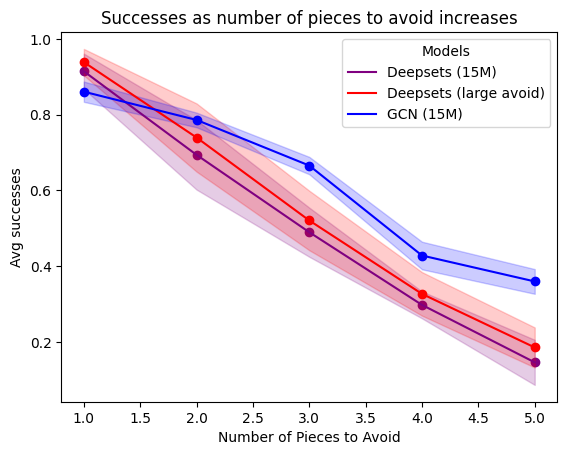

In [38]:
make_latest_ablation_graphs()